# Twitter Sentiment Analysis
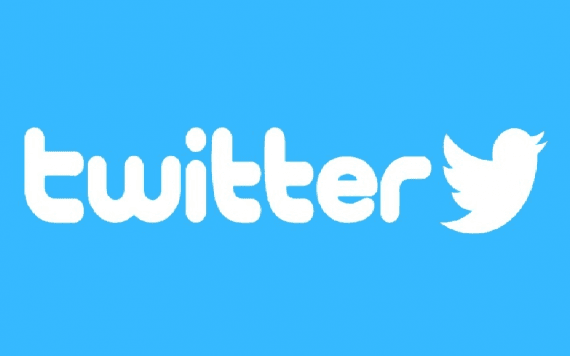

In [4]:
import numpy as np
import pandas as pd 

training_data=pd.read_csv(r'C:\Users\Tushar Mehra\Project_Twitter_Sentiment_Analysis\Train_tsa_x_y_train.csv')
testing_data=pd.read_csv(r'C:\Users\Tushar Mehra\Project_Twitter_Sentiment_Analysis\Test_tsa_x_test.csv')

In [6]:
training_data.head(10)

,tweet_id,airline_sentiment,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,567900433542488064,negative,Southwest,NaN,ColeyGirouard,NaN,0,"@SouthwestAir I am scheduled for the morning, ...",NaN,2015-02-17 20:16:29 -0800,Washington D.C.,Atlantic Time (Canada)
1,569989168903819264,positive,Southwest,NaN,WalterFaddoul,NaN,0,@SouthwestAir seeing your workers time in and ...,NaN,2015-02-23 14:36:22 -0800,"Indianapolis, Indiana; USA",Central Time (US & Canada)
2,568089179520954368,positive,United,NaN,LocalKyle,NaN,0,@united Flew ORD to Miami and back and had gr...,NaN,2015-02-18 08:46:29 -0800,Illinois,Central Time (US & Canada)
3,568928195581513728,negative,Southwest,NaN,amccarthy19,NaN,0,@SouthwestAir @dultch97 that's horse radish 😤🐴,NaN,2015-02-20 16:20:26 -0800,NaN,Atlantic Time (Canada)
4,568594180014014464,negative,United,NaN,J_Okayy,NaN,0,@united so our flight into ORD was delayed bec...,NaN,2015-02-19 18:13:11 -0800,NaN,Eastern Time (US & Canada)
5,569677636613439488,negative,United,NaN,bobgiolito,NaN,0,@united Why did you load us in this flying sar...,NaN,2015-02-22 17:58:27 -0800,"Los Angeles, CA",Pacific Time (US & Canada)
6,569658903044218880,negative,Delta,NaN,aaronkinnari,NaN,0,@JetBlue that is a stock response. Delays not ...,NaN,2015-02-22 16:44:00 -0800,Gotham,Quito
7,568542766860541952,positive,Delta,NaN,TimothySays,NaN,0,@JetBlue That'd be nice! Hoping to rack up eno...,NaN,2015-02-19 14:48:53 -0800,"Burlington, MA",Eastern Time (US & Canada)
8,570116209263427584,negative,United,NaN,lindaSWC,NaN,1,@united frankly worse customer service ever. P...,NaN,2015-02-23 23:01:11 -0800,NaN,NaN
9,568870144891600896,positive,Southwest,NaN,amyums,NaN,0,@SouthwestAir yeah haha. Never been in one. It...,NaN,2015-02-20 12:29:46 -0800,NaN,Central Time (US & Canada)


In [7]:
categories=training_data['airline_sentiment'].unique()
categories
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to C:\Users\Tushar
[nltk_data]     Mehra\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [8]:
training_data['text']=training_data['text'].astype('string')

In [10]:
documents=[]
for i in range(len(training_data)):
    documents.append((word_tokenize(training_data['text'][i]),training_data['airline_sentiment'][i]))
documents[:10]

[(['@',
   'SouthwestAir',
   'I',
   'am',
   'scheduled',
   'for',
   'the',
   'morning',
   ',',
   '2',
   'days',
   'after',
   'the',
   'fact',
   ',',
   'yes',
   '..',
   'not',
   'sure',
   'why',
   'my',
   'evening',
   'flight',
   'was',
   'the',
   'only',
   'one',
   'Cancelled',
   'Flightled'],
  'negative'),
 (['@',
   'SouthwestAir',
   'seeing',
   'your',
   'workers',
   'time',
   'in',
   'and',
   'time',
   'out',
   'going',
   'above',
   'and',
   'beyond',
   'is',
   'why',
   'I',
   'love',
   'flying',
   'with',
   'you',
   'guys',
   '.',
   'Thank',
   'you',
   '!'],
  'positive'),
 (['@',
   'united',
   'Flew',
   'ORD',
   'to',
   'Miami',
   'and',
   'back',
   'and',
   'had',
   'great',
   'crew',
   ',',
   'service',
   'on',
   'both',
   'legs',
   '.',
   'THANKS'],
  'positive'),
 (['@',
   'SouthwestAir',
   '@',
   'dultch97',
   'that',
   "'s",
   'horse',
   'radish',
   '😤🐴'],
  'negative'),
 (['@',
   'united',
   's

In [11]:
#defining a function to get simpler pos tags
from nltk.corpus import wordnet
def get_simple_pos(tag):
    if tag.startswith('J'): #if it starts with 'J'
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

In [12]:
#Getting stopwords
from nltk.corpus import stopwords
stop=stopwords.words('english') #getting english stopwords only

#Adding punctuations to list of stopwords
import string
punctuations=string.punctuation #this is a string
stop=stop+list(punctuations) #punctuations get added to the list of stopwords (only lists can be added)
stop[:12]

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll"]

In [13]:
from nltk.stem import WordNetLemmatizer
from nltk import pos_tag
lemmatizer=WordNetLemmatizer()
#Removing stopwords and conducting lammetization
def clean_review(words):
    output_words=[]
    for w in words:
        if w.lower() not in stop:
            pos=pos_tag([w])
            clean_word=lemmatizer.lemmatize(w,pos=get_simple_pos(pos[0][1]))
            #Part of speech cannot be passed directly as done before.
            #pos='a' signifies adjective but pos_tags work differently. Thus we'll do get_simple_pos()
            #pos[0][1] gives the 2nd entry of the 0th tuple i.e. the pos_tag as in the case of [('better', 'RBR')], 
            #it will give 'RBR'
            output_words.append(clean_word.lower()) #converting to lower case and appending in the array
    return output_words

In [19]:
documents=[(clean_review(document),category)for document,category in documents]

In [20]:
categories=[category for document,category in documents]
text_documents=[" ".join(document) for document,category in documents]

In [21]:
x_train=text_documents
y_train=categories

In [22]:
testing_data['text']=testing_data['text'].astype('string')

In [23]:
documents_test=[]
for i in range(len(testing_data)):
    documents_test.append(word_tokenize(testing_data['text'][i]))
documents_test[:25]

[['@',
  'AmericanAir',
  'In',
  'car',
  'gng',
  'to',
  'DFW',
  '.',
  'Pulled',
  'over',
  '1hr',
  'ago',
  '-',
  'very',
  'icy',
  'roads',
  '.',
  'On-hold',
  'with',
  'AA',
  'since',
  '1hr',
  '.',
  'Ca',
  "n't",
  'reach',
  'arpt',
  'for',
  'AA2450',
  '.',
  'Wat',
  '2',
  'do',
  '?'],
 ['@',
  'AmericanAir',
  'after',
  'all',
  ',',
  'the',
  'plane',
  'didn',
  '’',
  't',
  'land',
  'in',
  'identical',
  'or',
  'worse',
  ')',
  'conditions',
  'at',
  'GRK',
  'according',
  'to',
  'METARs',
  '.'],
 ['@',
  'SouthwestAir',
  'ca',
  "n't",
  'believe',
  'how',
  'many',
  'paying',
  'customers',
  'you',
  'left',
  'high',
  'and',
  'dry',
  'with',
  'no',
  'reason',
  'for',
  'flight',
  'Cancelled',
  'Flightlations',
  'Monday',
  'out',
  'of',
  'BDL',
  '!',
  'Wow',
  '.'],
 ['@',
  'USAirways',
  'I',
  'can',
  'legitimately',
  'say',
  'that',
  'I',
  'would',
  'have',
  'rather',
  'driven',
  'cross',
  'country',
  'than',


In [24]:
documents_test=[(clean_review(document))for document in documents_test]
text_documents_test=[" ".join(document) for document in documents_test]

In [25]:
x_test=text_documents_test

In [26]:
from sklearn.feature_extraction.text import CountVectorizer
count_vec1=CountVectorizer(max_features=10000) #ex: top 1000 words
x_train_features1=count_vec1.fit_transform(x_train)
x_test_features1=count_vec1.transform(x_test)

# 1. Support Vector Machine

In [27]:
from sklearn.svm import SVC
svc=SVC()
svc.fit(x_train_features1,y_train)
y_pred1=svc.predict(x_test_features1)

# 2. Random Forest Classifier

In [28]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(x_train_features1,y_train)
y_pred2=rf.predict(x_test_features1)

# 3. Multinomial Naive Bayes 

In [29]:
from sklearn.naive_bayes import MultinomialNB
mnb=MultinomialNB()
mnb.fit(x_train_features1,y_train)
y_pred3=mnb.predict(x_test_features1)

In [34]:
np.savetxt('TSA_SVM_Predictions.csv',y_pred1,delimiter=',',fmt='%s')

In [35]:
np.savetxt('TSA_RF_Predictions.csv',y_pred2,delimiter=',',fmt='%s')

In [36]:
np.savetxt('TSA_MNB_Predictions.csv',y_pred3,delimiter=',',fmt='%s')